<h1><center>Analysis of the Breast Cancer Dataset</center></h1>
<center>Exploration of supervised learning techniques on the Breast Cancer Wisconsin (Diagnostic) Data Set</center>

## Setup

In [77]:
# Libaries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import subprocess

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit, GridSearchCV
from sklearn import metrics

In [3]:
# Import the data
def get_bcw_data():
    if os.path.exists("bcw_data.csv"):
        print("-- bcw_data.csv found locally")
        df = pd.read_csv('bcw_data.csv', index_col=0)
        return df
    else:
        print("-- data not found locally")
        return -1
df = get_bcw_data()

-- bcw_data.csv found locally


In [43]:
# Encode the data
def encode_bcw_target(df, target_column):
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {'M':1, 'B':0}
    # map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["target"] = df_mod[target_column].replace(map_to_int)
    return (df_mod, targets)
df, targets = encode_bcw_target(df, "diagnosis")

In [83]:
# Select features
features = list(df.columns[1:31])
X = df[features]
y = df["target"]

In [84]:
# Split the data in to train and test
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

## Decision Trees

In [85]:
# Decision Tree Analysis
from sklearn.tree import DecisionTreeClassifier
print("-- Running DT")
max_depth = 5
dt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)  # entropy and gini performed about the same
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

-- Running DT
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       108
          1       0.97      0.90      0.93        63

avg / total       0.95      0.95      0.95       171



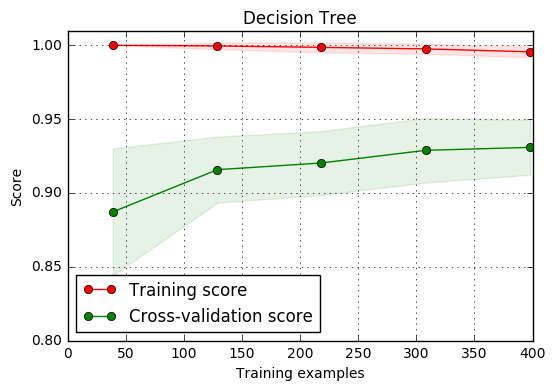

In [87]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
cv = ShuffleSplit(n_splits=100, test_size=test_size, random_state=42)
plot_learning_curve(dt, "Decision Tree", X, y, ylim=(0.8, 1.01), cv=cv)
plt.show()

The dataset could clearly benefit from more data

## Boosting

In [88]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier
print("-- Running Adaboost")
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.99)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

-- Running Adaboost
             precision    recall  f1-score   support

          0       0.98      0.97      0.98       108
          1       0.95      0.97      0.96        63

avg / total       0.97      0.97      0.97       171



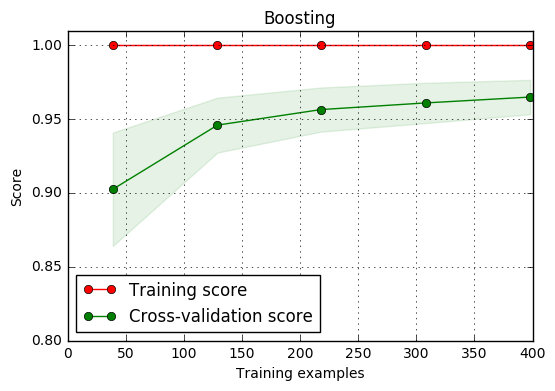

In [75]:
plot_learning_curve(ada, "Boosting", X, y, ylim=(0.8, 1.01), cv=cv)
plt.show()

## SVM

In [90]:
# Support Vector Machines
from sklearn import svm
print("-- Running SVM")
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

-- Running SVM
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       108
          1       0.97      0.94      0.95        63

avg / total       0.96      0.96      0.96       171



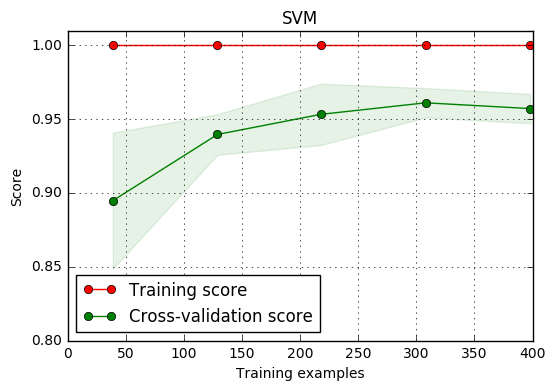

In [91]:
plot_learning_curve(ada, "SVM", X, y, ylim=(0.8, 1.01), cv=cv)
plt.show()